(1)

In [1]:
from sympy import symbols, I, ln, cos, sin, re, im, arg, Abs

# 変数 r と theta を定義
r, theta = symbols('r theta')

# z = r(cos(theta) + i*sin(theta)) を定義
z = r * (cos(theta) + I*sin(theta))

# W(z) = z - 4i*ln(z) を定義し、z を代入
W_z = z - 4*I*ln(z)
W_z_substituted = W_z.subs(z, r*(cos(theta) + I*sin(theta)))

# 式を展開
W_z_expanded = W_z_substituted.expand()

# 実部と虚部を取得
phi = W_z_expanded.as_real_imag()[0]
psi = W_z_expanded.as_real_imag()[1]

# 実部の式を簡略化
phi_simplified = phi.subs([(re(r*cos(theta)), r*cos(theta)),
                           (im(r*sin(theta)), 0),
                           (arg(r*(I*sin(theta) + cos(theta))), theta)])

# 虚部の式を簡略化
psi_simplified = psi.subs([(Abs(I*r*sin(theta) + r*cos(theta)), r),
                           (re(r*sin(theta)), r*sin(theta)),
                           (im(r*cos(theta)), 0)])

# 簡略化された実部と虚部の式を表示
phi_simplified, psi_simplified

(r*cos(theta) + 4*theta, r*sin(theta) - 4*log(r))

(2)

In [2]:
from sympy import diff

u_r = diff(phi_simplified, r)
u_theta = 1/r *diff(phi_simplified, theta)

u_r, u_theta

(cos(theta), (-r*sin(theta) + 4)/r)

(3)

In [34]:
from sympy import solve, pi, sqrt, atan2

r, theta, u_r, u_theta, u_x, u_y = symbols('r theta u_r u_theta u_x u_y')

# 与えられた値
u_r = cos(theta)
u_theta = 1/r * (4 - r*sin(theta))

# u_r と u_theta を u_x と u_y に変換
u_x = u_r*cos(theta) - u_theta*sin(theta)
u_y = u_r*sin(theta) + u_theta*cos(theta)

# x軸上の3点
x_values = [-2, 1, 4]
y_values = [0, 0, 0]

def compute_u_r_theta(x_value, y_value):
    #直交座標を極座標に変換する
    r_value = sqrt(x_value**2 + y_value**2)
    theta_value = atan2(y_value, x_value)
    # u_r, u_theta を計算
    u_r_value = u_r.subs([(r, r_value), (theta, theta_value)])
    u_theta_value = u_theta.subs([(r, r_value), (theta, theta_value)])
    size=sqrt(u_r_value**2 + u_theta_value**2)
    return u_r_value, u_theta_value, size

for x_value, y_value in zip(x_values, y_values):
     u_r_theta =compute_u_r_theta(x_value,y_value)
     print('(x,y)=({0},{1})でu_r={2},u_theta={3} 大きさ {4}'.format(x_value, y_value,u_r_theta[0],u_r_theta[1],u_r_theta[2]))

#出力結果
# (x,y)=(-2,0)でu_r=-1,u_theta=2 大きさ sqrt(5)
# (x,y)=(1,0)でu_r=1,u_theta=4 大きさ sqrt(17)
# (x,y)=(4,0)でu_r=1,u_theta=1 大きさ sqrt(2)

(x,y)=(-2,0)でu_r=-1,u_theta=2 大きさ sqrt(5)
(x,y)=(1,0)でu_r=1,u_theta=4 大きさ sqrt(17)
(x,y)=(4,0)でu_r=1,u_theta=1 大きさ sqrt(2)


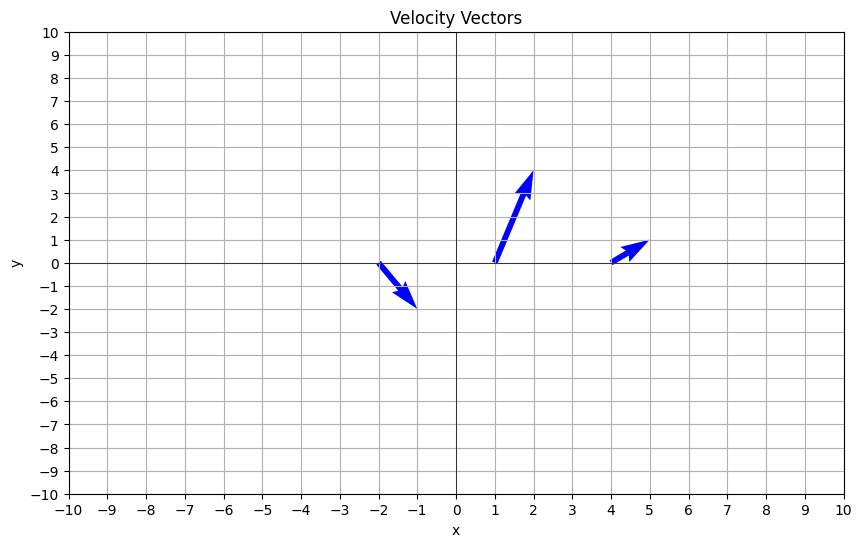

In [18]:
import matplotlib.pyplot as plt
import numpy as np

u_x_values = []
u_y_values = []

#図示するため、x,y方向の速度ベクトルを求める
def velocity_vector_cartesian(x, y):
    r = sqrt(x ** 2 + y ** 2)
    theta = atan2(y, x)
    u_r = cos(theta)
    u_theta = 1/r * (4 - r*sin(theta))
    u_x_value = u_r * cos(theta) - u_theta * sin(theta)
    u_y_value = u_r * sin(theta) + u_theta * cos(theta)

    u_x_value =float(u_x_value)
    u_y_value =float(u_y_value)

    u_x_values.append(u_x_value)
    u_y_values.append(u_y_value)

for x_value, y_value in zip(x_values, y_values):
    velocity_vector_cartesian(x_value,y_value)

# グリッド間隔1でプロットを作成する
plt.figure(figsize=(10, 6))
plt.quiver(x_values, y_values, u_x_values, u_y_values, angles='xy', scale_units='xy', scale=1, color='b')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.xticks(np.arange(-10, 11, 1))
plt.yticks(np.arange(-10, 11, 1))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Velocity Vectors')
plt.savefig("sample.png")
plt.show()


(4)

In [ ]:
# u_r = 0となるθを求める
theta_stagnation = solve(u_r, theta)
# 0 <= θ <= 2πの範囲内にある値だけを保持する
theta_stagnation = [t for t in theta_stagnation if 0 <= t <= 2*pi]

# 求めたθとu_theta = 0からrを求める
r_stagnation = [solve(u_theta.subs(theta, t), r) for t in theta_stagnation]

print(r_stagnation)#[[4], [-4]] rは正の値を取るのでr=4
# 極座標を直交座標に変換する
x_stagnation = r_stagnation[0][0] * cos(theta_stagnation[0])
y_stagnation = r_stagnation[0][0] * sin(theta_stagnation[0])

x_stagnation, y_stagnation



[[4], [-4]]


(0, 4)

(5)

(x,y)=(0,-4)でu_r=0,u_theta=2 大きさ 2
(x,y)=(0,-2)でu_r=0,u_theta=3 大きさ 3
(x,y)=(0,-1)でu_r=0,u_theta=5 大きさ 5
(x,y)=(0,1)でu_r=0,u_theta=3 大きさ 3
(x,y)=(0,2)でu_r=0,u_theta=1 大きさ 1
(x,y)=(0,8)でu_r=0,u_theta=-1/2 大きさ 1/2


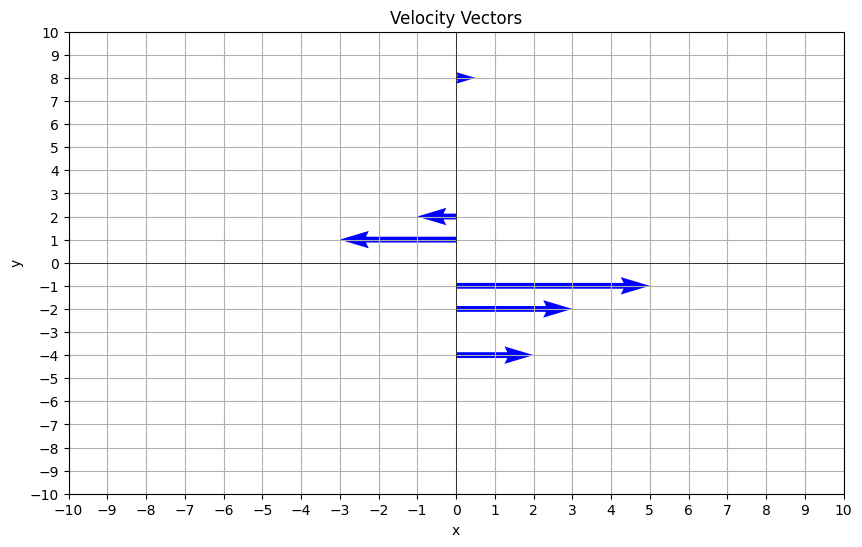

In [35]:
# y軸上の6点
x_values = [0, 0, 0, 0, 0, 0]
y_values = [-4, -2, -1, 1, 2, 8]

for x_value, y_value in zip(x_values, y_values):
     u_r_theta =compute_u_r_theta(x_value,y_value)
     print('(x,y)=({0},{1})でu_r={2},u_theta={3} 大きさ {4}'.format(x_value, y_value,u_r_theta[0],u_r_theta[1],u_r_theta[2]))
#出力結果
# (x,y)=(0,-4)でu_r=0,u_theta=2 大きさ 2
# (x,y)=(0,-2)でu_r=0,u_theta=3 大きさ 3
# (x,y)=(0,-1)でu_r=0,u_theta=5 大きさ 5
# (x,y)=(0,1)でu_r=0,u_theta=3 大きさ 3
# (x,y)=(0,2)でu_r=0,u_theta=1 大きさ 1
# (x,y)=(0,8)でu_r=0,u_theta=-1/2 大きさ 1/2

#リセット
u_x_values = []
u_y_values = []

for x_value, y_value in zip(x_values, y_values):
    velocity_vector_cartesian(x_value,y_value)

# グリッド間隔1でプロットを作成する
plt.figure(figsize=(10, 6))
plt.quiver(x_values, y_values, u_x_values, u_y_values, angles='xy', scale_units='xy', scale=1, color='b')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.xticks(np.arange(-10, 11, 1))
plt.yticks(np.arange(-10, 11, 1))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Velocity Vectors')
plt.savefig("sample.png")
plt.show()

(6)渦糸（自由渦）と一様流れ